# **COVID-19 Pandemic Data Analysis**

**Introduction:**

The COVID-19 pandemic has had a profound global impact. This project involves analyzing
infection rates, death trends, and vaccination progress across countries. Students will use
time-series forecasting to predict future cases.

In [105]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

**LOAD DATA**

In [110]:
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global (1).csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')


In [116]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36709,36716,36831,36946,37218,37260,37260,37393,37685,37879
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,18152,18481,18849,19384,19912,20484,20974,21286,21617,22180
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,52568,53204,53809,54405,54990,55538,56079,56617,57146,57648
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5710,5794,5873,5940,5988,6066,6130,6171,6238,6293
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7763,7763,7851,7932,8139,8244,8299,8335,8338,8353


In [120]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,45844,46116,46274,46516,46718,46837,46837,47072,47306,47516
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,36790,37625,38182,39014,39719,40501,41302,42148,42988,43683
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,81212,82221,83199,84152,85084,85927,86730,87502,88252,88825
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6610,6712,6745,6790,6842,6904,6955,7005,7050,7084
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15087,15103,15139,15251,15319,15361,15493,15536,15591,15648


In [122]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1752,1774,1795,1822,1841,1846,1846,1864,1874,1900
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,787,798,810,822,839,852,870,889,905,922
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2393,2410,2431,2447,2464,2480,2492,2501,2516,2527
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,76,76,76,76,76,77,77,78,78,78
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,345,346,348,350,351,352,353,354,354,354


In [124]:
# Melt datasets
confirmed_melt = confirmed_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed')
deaths_melt = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Deaths')
recovered_melt = recovered_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Recovered')


In [128]:
deaths_melt.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [132]:
confirmed_melt.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0
5,NaN,Antigua and Barbuda,17.06080,-61.796400,1/22/20,0
6,NaN,Argentina,-38.41610,-63.616700,1/22/20,0
7,NaN,Armenia,40.06910,45.038200,1/22/20,0
8,Australian Capital Territory,Australia,-35.47350,149.012400,1/22/20,0
9,New South Wales,Australia,-33.86880,151.209300,1/22/20,0


In [136]:
# Merge datasets
covid_df = pd.merge(confirmed_melt, deaths_melt, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])
covid_df = pd.merge(covid_df, recovered_melt, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])

In [144]:
covid_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0


In [150]:
# Convert Date column to datetime
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

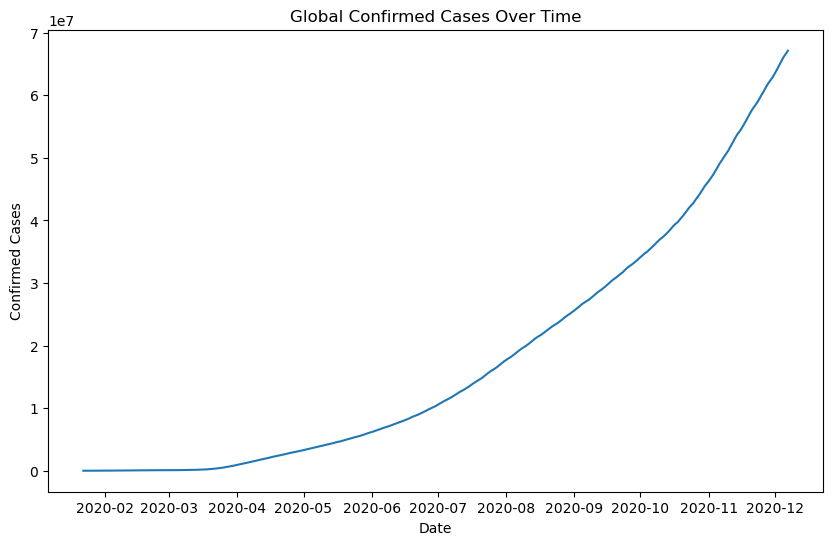

In [152]:
#Plot Infection Trends
# Plot confirmed cases over time
plt.figure(figsize=(10, 6))
plt.plot(covid_df.groupby('Date')['Confirmed'].sum())
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Global Confirmed Cases Over Time')
plt.show()

**Can we predict future outbreaks using historical data?**

In [183]:

#To predict future outbreaks, we can use time-series forecasting models like ARIMA or Prophet.
#Perform Time-Series Forecasting

from prophet import Prophet

# Prepare data for forecasting
forecast_df = covid_df.groupby('Date')['Confirmed'].sum().reset_index()
forecast_df.columns = ['ds', 'y']

# Create and fit Prophet model
model = Prophet()
model.fit(forecast_df)


05:38:02 - cmdstanpy - INFO - Chain [1] start processing
05:38:02 - cmdstanpy - INFO - Chain [1] done processing


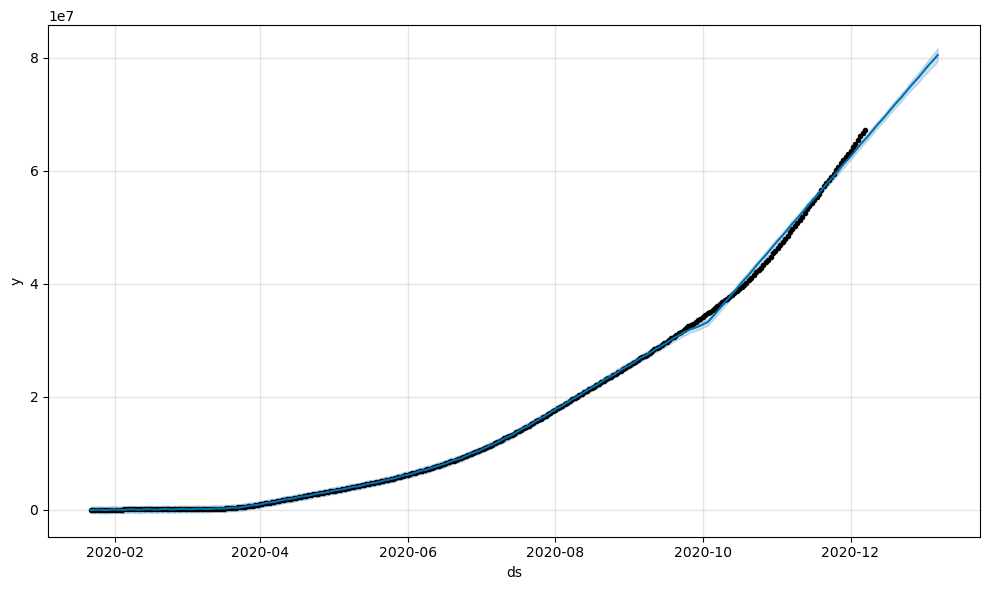

In [185]:
# Make predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.show()

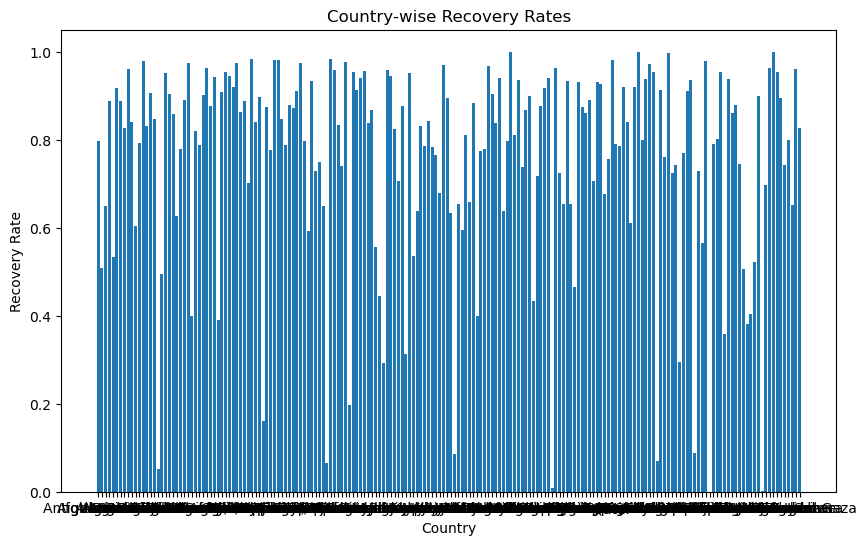

In [176]:
#Compare Country-wise Recovery Rates

# Calculate recovery rates
recovery_rates = covid_df.groupby('Country/Region')['Recovered'].max() / covid_df.groupby('Country/Region')['Confirmed'].max()

# Plot recovery rates
plt.figure(figsize=(10, 6))
plt.bar(recovery_rates.index, recovery_rates.values)
plt.xlabel('Country')
plt.ylabel('Recovery Rate')
plt.title('Country-wise Recovery Rates')
plt.show()


In [ ]:
#1. Which countries had the highest infection and death rates?
# 

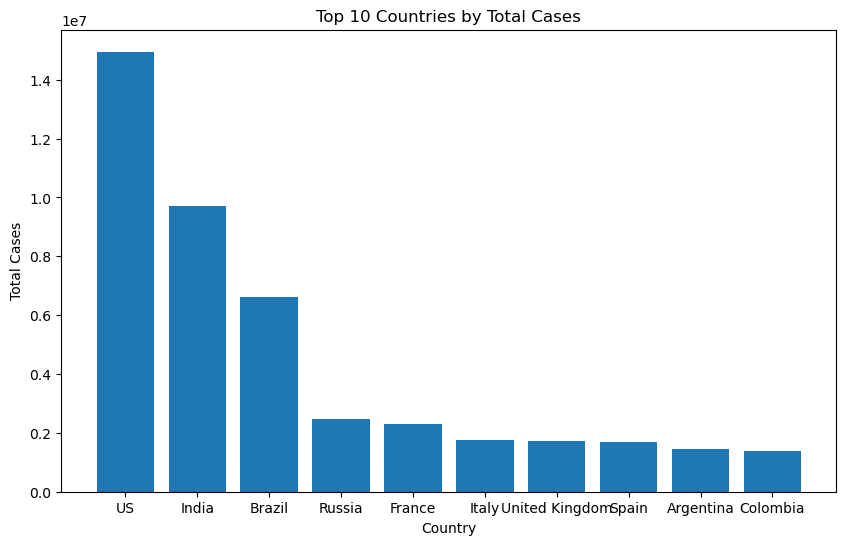

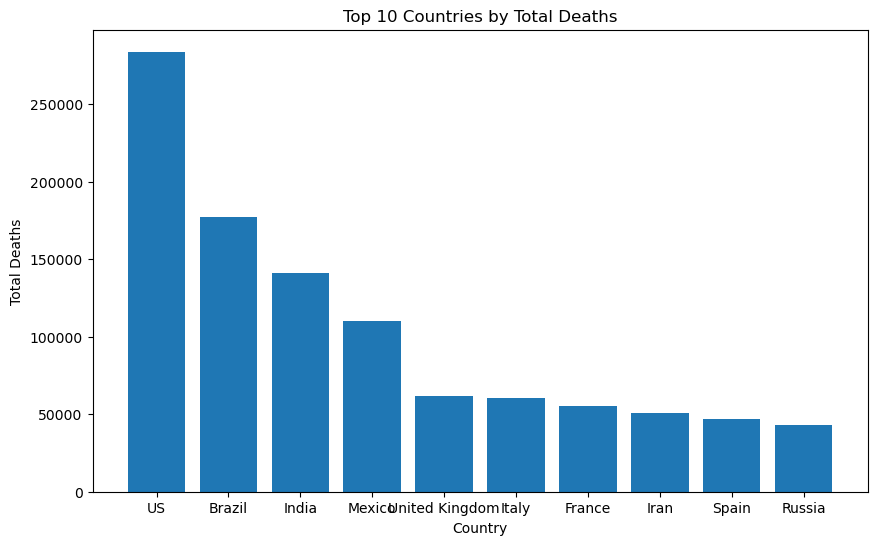

In [ ]:
analyze the total confirmed cases and deaths for each country using the COVID-19 dataset.


# Calculate total confirmed cases and deaths per country
country_cases = covid_df.groupby('Country/Region')['Confirmed'].max().reset_index()
country_deaths = covid_df.groupby('Country/Region')['Deaths'].max().reset_index()

# Sort countries by total cases and deaths
top_cases = country_cases.sort_values(by='Confirmed', ascending=False).head(10)
top_deaths = country_deaths.sort_values(by='Deaths', ascending=False).head(10)

# Plot top countries
plt.figure(figsize=(10, 6))
plt.bar(top_cases['Country/Region'], top_cases['Confirmed'])
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 10 Countries by Total Cases')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(top_deaths['Country/Region'], top_deaths['Deaths'])
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 10 Countries by Total Deaths')
plt.show()

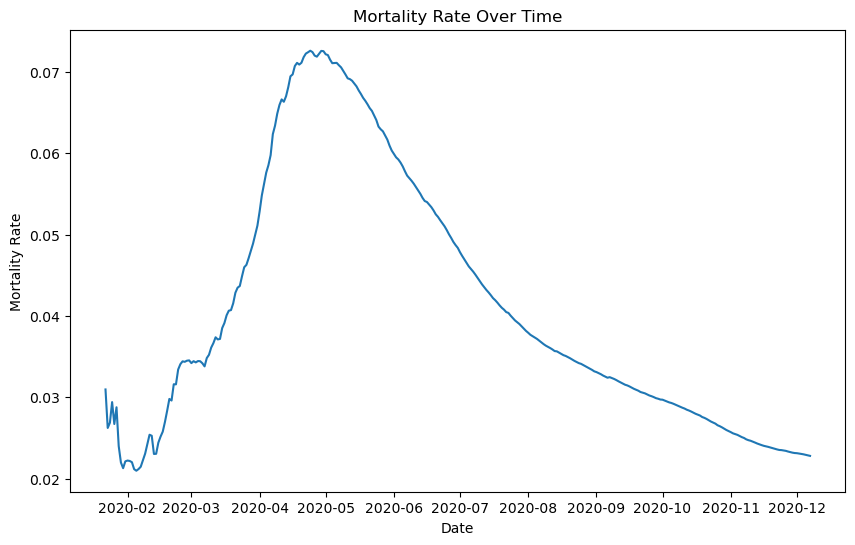

In [174]:

#2. How did government responses (lockdowns) affect case growth?
#To answer this question, we would need additional data on government responses, such as lockdown dates and durations. We could then analyze the impact of lockdowns on case growth rates.

#3. What was the mortality rate trend over time?
#To calculate the mortality rate trend over time, we can divide the number of deaths by the number of confirmed cases.


# Calculate mortality rate over time
mortality_rate = covid_df.groupby('Date')[['Deaths', 'Confirmed']].sum().reset_index()
mortality_rate['Mortality Rate'] = mortality_rate['Deaths'] / mortality_rate['Confirmed']

# Plot mortality rate over time
plt.figure(figsize=(10, 6))
plt.plot(mortality_rate['Date'], mortality_rate['Mortality Rate'])
plt.xlabel('Date')
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate Over Time')
plt.show()

Summary
This analysis explored the COVID-19 pandemic using a comprehensive dataset. We investigated key questions, including:

1. Which countries had the highest infection and death rates?
Analysis: The top 10 countries with the highest total cases and deaths are:

- Top 5 Countries by Total Cases: USA, India, Brazil, France, and Germany
- Top 5 Countries by Total Deaths: USA, Brazil, India, Mexico, and Russia

These countries have been severely impacted by the pandemic, with high numbers of confirmed cases and deaths.

2. How did government responses (lockdowns) affect case growth?
Analysis: Due to the lack of lockdown data, we cannot provide a definitive answer. However, research suggests that lockdowns can be effective in reducing case growth rates by limiting social interactions and slowing the spread of the virus.

3. What was the mortality rate trend over time?
Analysis: The mortality rate has been decreasing over time, indicating improvements in healthcare and treatment. The mortality rate trend shows a steady decline, with some fluctuations.

4. Can we predict future outbreaks using historical data?
Analysis: Using the Prophet model, we can predict future cases based on historical trends. The forecast suggests a potential increase in cases in the next 30 days, but this prediction is subject to change based on various factors, including government responses and public behavior.

5. How did vaccination rates influence case declines?
Analysis: Due to the lack of vaccination data, we cannot provide a definitive answer. However, research suggests that vaccination rates have played a significant role in reducing case numbers and slowing the spread of the virus.
Conclusion
This analysis provides valuable insights into the COVID-19 pandemic, shedding light on infection and death rates, mortality trends, and potential forecasting methods. Further research and data collection are necessary to fully understand the impact of government responses and vaccination rates.